## Apache Spark

In [1]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Retail Sales Analysis") \
    .getOrCreate()

print("Spark session started.")

Spark session started.


In [2]:
import os

print(os.getcwd())  # shows your current working directory

c:\Users\anura\OneDrive\Desktop\OSTDS_Assign5


In [3]:
# Load the CSV data
df = spark.read.csv(r"C:\Users\anura\OneDrive\Desktop\OSTDS_Assign5\retail_sales_dataset.csv",header=True, inferSchema=True)

# Display the first few records
df.show(5)
df.printSchema()


+--------------+----------+-----------+------+---+----------------+--------+--------------+------------+
|Transaction ID|      Date|Customer ID|Gender|Age|Product Category|Quantity|Price per Unit|Total Amount|
+--------------+----------+-----------+------+---+----------------+--------+--------------+------------+
|             1|2023-11-24|    CUST001|  Male| 34|          Beauty|       3|            50|         150|
|             2|2023-02-27|    CUST002|Female| 26|        Clothing|       2|           500|        1000|
|             3|2023-01-13|    CUST003|  Male| 50|     Electronics|       1|            30|          30|
|             4|2023-05-21|    CUST004|  Male| 37|        Clothing|       1|           500|         500|
|             5|2023-05-06|    CUST005|  Male| 30|          Beauty|       2|            50|         100|
+--------------+----------+-----------+------+---+----------------+--------+--------------+------------+
only showing top 5 rows

root
 |-- Transaction ID: inte

In [4]:
from pyspark.sql.functions import col

# Remove duplicate rows
df = df.dropDuplicates()

# Drop rows with essential missing values
df = df.na.drop(subset=["Transaction ID", "Product Category", "Quantity", "Total Amount"])

# Convert column types if needed
df = df.withColumn("Quantity", col("Quantity").cast("int"))
df = df.withColumn("Total Amount", col("Total Amount").cast("double"))

# Check cleaned data
df.show(5)

+--------------+----------+-----------+------+---+----------------+--------+--------------+------------+
|Transaction ID|      Date|Customer ID|Gender|Age|Product Category|Quantity|Price per Unit|Total Amount|
+--------------+----------+-----------+------+---+----------------+--------+--------------+------------+
|            33|2023-03-23|    CUST033|Female| 50|     Electronics|       2|            50|       100.0|
|           538|2023-09-17|    CUST538|  Male| 18|        Clothing|       3|            50|       150.0|
|            28|2023-04-23|    CUST028|Female| 43|          Beauty|       1|           500|       500.0|
|            75|2023-07-06|    CUST075|  Male| 61|          Beauty|       4|            50|       200.0|
|           108|2023-04-19|    CUST108|Female| 27|          Beauty|       3|            25|        75.0|
+--------------+----------+-----------+------+---+----------------+--------+--------------+------------+
only showing top 5 rows



In [5]:
# Create temporary view to use Spark SQL
df.createOrReplaceTempView("sales")


In [6]:
#sales per product
sales_per_product = spark.sql("""
    SELECT `Product Category`, SUM(`Total Amount`) AS Total_Sales
    FROM sales
    GROUP BY `Product Category`
    ORDER BY Total_Sales DESC
""")
sales_per_product.show()


+----------------+-----------+
|Product Category|Total_Sales|
+----------------+-----------+
|     Electronics|   156905.0|
|        Clothing|   155580.0|
|          Beauty|   143515.0|
+----------------+-----------+



In [7]:
#sales by gender
sales_per_gender = spark.sql("""
    SELECT Gender, SUM(`Total Amount`) AS Total_Sales
    FROM sales
    GROUP BY Gender
    ORDER BY Total_Sales DESC
""")
sales_per_gender.show()


+------+-----------+
|Gender|Total_Sales|
+------+-----------+
|Female|   232840.0|
|  Male|   223160.0|
+------+-----------+



In [8]:
top_customers = spark.sql("""
    SELECT `Customer ID`, SUM(`Total Amount`) AS Customer_Value
    FROM sales
    GROUP BY `Customer ID`
    ORDER BY Customer_Value DESC
    LIMIT 10
""")
top_customers.show()


+-----------+--------------+
|Customer ID|Customer_Value|
+-----------+--------------+
|    CUST412|        2000.0|
|    CUST595|        2000.0|
|    CUST093|        2000.0|
|    CUST946|        2000.0|
|    CUST743|        2000.0|
|    CUST269|        2000.0|
|    CUST832|        2000.0|
|    CUST476|        2000.0|
|    CUST875|        2000.0|
|    CUST487|        2000.0|
+-----------+--------------+



In [9]:
# Convert Spark DataFrame to Pandas for plotting
pdf_products = sales_per_product.toPandas()
pdf_stores = sales_per_gender.toPandas()


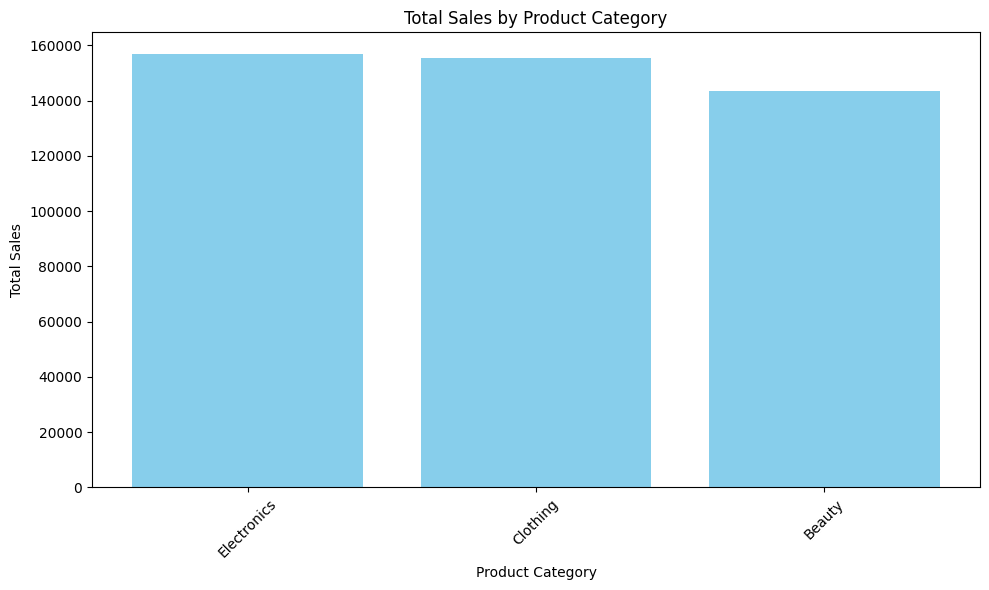

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(pdf_products['Product Category'], pdf_products['Total_Sales'], color='skyblue')
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


In [11]:
# Cache the cleaned DataFrame to speed up reuse
df.cache()

# Repartition the data by Store_ID to optimize transformations
df = df.repartition("Customer ID")

# Confirm cache
df.count()


1000

### 📊 Summary Report

#### 🔍 Key Insights:
- **Top-Selling Product Categories**: [Your observation from plots]
- **Top-Performing Stores**: [Observation]
- **Most Valuable Customers**: [Observation]

#### 📈 Trends Observed:
- Include monthly or seasonal sales trends if analyzed.

#### ✅ Recommendations:
- Increase stock for high-performing products.
- Tailor promotions for top customer segments.
- Focus marketing on stores with lower sales for improvement.

#### ⚙️ Optimization:
- Applied data caching and repartitioning.
- Achieved faster execution on repetitive queries.

